# Project 2: Netflix Data Analysis

In this project we will be working with a dataset of Netflix titles. We will be using its data to answer some questions about Netflix titles, directors, and countries using Pandas. We will also use Matplotlib to do a couple of interesting visualizations to get more interesting insights. The data is stored in a csv file named `netflix_titles.csv`.

Data extracted from: https://www.kaggle.com/datasets/shivamb/netflix-shows (with some cleaning and modifications).


### Project Tasks:

- `2.1.` Load the data using Pandas read_csv, use `show_id` as the index_col parameter.

- `2.2.` What is the min and max release years?  

- `2.3.` How many director names are missing values (NaN)?  

- `2.4.` How many different countries are there in the data?  

- `2.5.` How many characters long are on average the title names? (create a new column with the titles length if needed)  

- `2.6.` For a given year, make a pie chart of the number of movies and series combined made by every country, limit it to the top 10 countries.

- `2.7.` Make a line chart of the average duration of movies (not TV shows) in minutes for every year across all the years. (hint: you can create a new column with the integer value of the minutes and then use groupby year and then average on that minutes column)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Ex 2.1: Load the data using Pandas read_csv, use `show_id` as the index_col parameter. 

data_path = "../data/netflix_titles.csv"

movies_df = pd.read_csv(data_path,index_col="show_id") # TODO

movies_df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [10]:
# Ex 2.2: What is the min and max release years?

min_year = movies_df["release_year"].min()  # TODO
max_year = movies_df["release_year"].max()  # TODO

print(f"Min year: {min_year}, Max year: {max_year}")

Min year: 1925, Max year: 2021


In [12]:
# Ex 2.3: How many director names are missing values (NaN)?

num_missing_directors = movies_df['director'].isnull().sum()  # TODO

print(f"Number of missing directors: {num_missing_directors}")

Number of missing directors: 2634


In [ ]:
# Ex 2.4: How many different countries are there in the data?

# You will need to fill the NaN (missing) values with the string "Unknown" first. 
# Then list the unique entries. As some of them are lists of countries already, because that movie/series was produced in multiple countries, 
# you will need to join with ", " all the elements of the list into a single string, and then split it by ", " to get a list of all the individual countries.

# Finally, you can get the number of unique countries by getting the length of the list of unique countries, you can use a set {} to get the unique countries or convert the entire
# list into a pd.Series and use .unique() to get the list of unique countries and then its number.

movies_df['country'] = movies_df['country'].fillna("Unknown")

all_countries = []

for value in movies_df['country']:
    
    countries = value.split(", ")
    
    for country in countries:
        all_countries.append(country)

unique_countries = set(all_countries)

len(unique_countries)
#len(unique_countries)
print(f"There are {unique_countries} different countries in the data")

There are {'', 'Angola', 'Somalia', 'Iran', 'Israel', 'Bermuda', 'Netherlands', 'Egypt', 'Vatican City', 'Japan', 'East Germany', 'Qatar', 'Mauritius', 'South Korea', 'Philippines', 'United States', 'Cyprus', 'West Germany', 'India', 'Nepal', 'Taiwan', 'Puerto Rico', 'Bulgaria', 'United Arab Emirates', 'Uganda', 'South Africa', 'Belarus', 'Serbia', 'Iceland', 'Colombia', 'Malaysia', 'Ukraine', 'Poland', 'Zimbabwe', 'Malawi', 'Kazakhstan', 'Slovenia', 'Georgia', 'Germany', 'Ghana', 'Vietnam', 'Iraq', 'Singapore', 'Morocco', 'Dominican Republic', 'Chile', 'Bangladesh', 'Soviet Union', 'Ecuador', 'Senegal', 'Portugal', 'Spain', 'Nigeria', 'Afghanistan', 'Azerbaijan', 'Jordan', 'Liechtenstein', 'Indonesia', 'Mongolia', 'Botswana', 'Panama', 'United Kingdom,', 'Jamaica', 'Finland', 'Mexico', 'Uruguay', 'Lebanon', 'Switzerland', 'France', 'Guatemala', 'Luxembourg', 'Hungary', 'Ethiopia', 'Montenegro', 'Croatia', 'Greece', 'Cambodia,', 'Algeria', 'Sweden', 'Czech Republic', 'Romania', 'Belgiu

In [24]:
# Ex 2.5: How many characters long are on average the title names?
 
# hint: (create a new column with the titles length if needed, you can use the apply method like .apply(lambda x: len(x)) , then get the mean of that column)
movies_df['title_length'] = movies_df['title'].apply(lambda x: len(x))

avg_title_length =  movies_df['title_length'].mean()

print(f"The average title length is {avg_title_length} characters")

The average title length is 17.725899852390143 characters


country
United States                    25
India                            20
Turkey                            3
Taiwan                            2
Japan                             2
United States, United Kingdom     2
United States, Germany            2
France, Japan, United States      1
China, Hong Kong                  1
Lebanon                           1
Name: count, dtype: int64


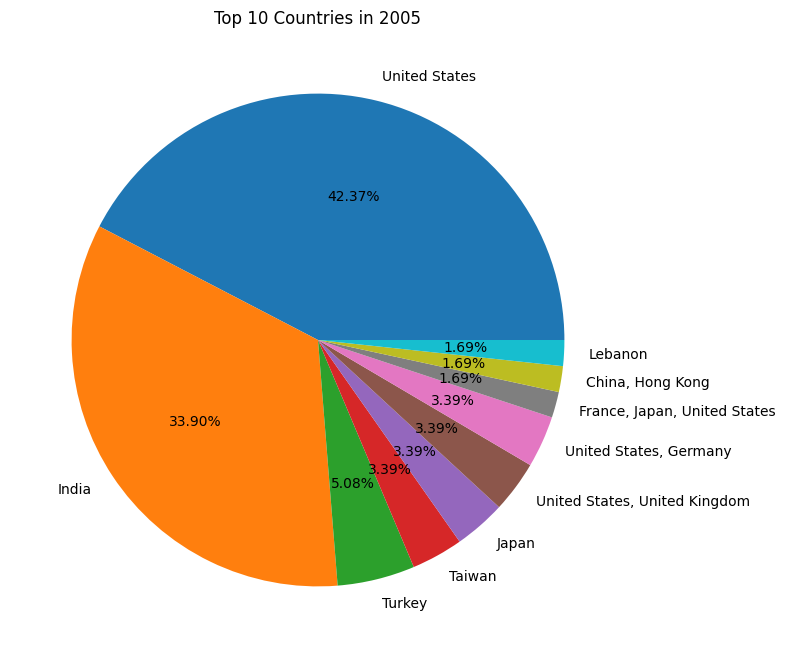

In [27]:
# Ex 2.6: For a given year, get the Pandas Series of how many movies and series combined were made by every country, limit it to the top 10 countries.

# It's optional to clean or modify the data of countries in this case, you can just use the data as it is.

# hint: (you can use the .loc method to filter the data by year, and then use the .value_counts() method to get the number of movies and series combined for each country, 
# finally use the head(10) method to get the top 10 countries)

year = 2005   # you can try to change the year to see the results for different years 

year_df = movies_df.loc[movies_df['release_year'] == year]

top_10_countries = year_df['country'].value_counts().head(10)  # TODO: top_10_countries has to be a Pandas Series with the top 10 countries with the number of movies and series combined for that year

print(top_10_countries)

# Code to plot the pie chart from your data results
fig = plt.figure(figsize=(8, 8))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct="%.2f%%")
plt.title(f"Top 10 Countries in {year}")

plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_13744\2344947478.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_movies_df['duration_minutes'] = only_movies_df['duration'].apply(


<Figure size 900x600 with 0 Axes>

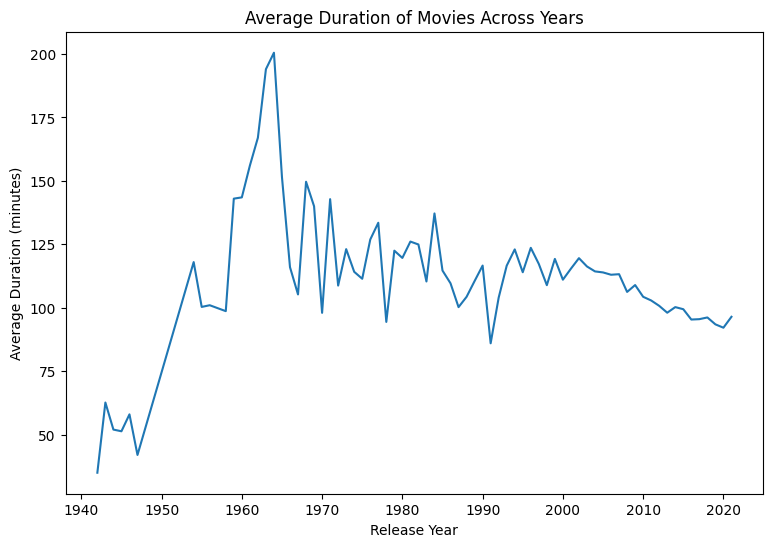

In [38]:
# Ex 2.7: Make a line chart of the average duration of movies (not TV shows) in minutes for every year across all the years. 

# (hint: you can create a new column with the integer value of the minutes of the movies, it's possible to do it with the .apply() 
# method and a lambda function, getting only stripping the minutes of it and converting the digit number to an integer
# or you can also do this process with a for loop over the dataframe rows like <for row_id, row in df.iterrows(): > creating every new value of that row for the new column

# Then use groupby year and in order to average on that movies minutes column)
only_movies_df = movies_df.loc[movies_df['type'] == 'Movie']

only_movies_df['duration_minutes'] = only_movies_df['duration'].apply(
    lambda x: int(x.replace(" min", ""))
)

#print(only_movies_df)
movies_avg_duration_per_year = only_movies_df.groupby(
    'release_year'
)['duration_minutes'].mean()
fig = plt.figure(figsize=(9, 6))


# TODO: generate the line plot using plt.plot() and the information from movies_avg_duration_per_year (the vertical axis with the minutes value) and its index (the horizontal axis with the years)

fig = plt.figure(figsize=(9, 6))

plt.plot(
    movies_avg_duration_per_year.index,
    movies_avg_duration_per_year.values
)

plt.xlabel("Release Year")
plt.ylabel("Average Duration (minutes)")
plt.title("Average Duration of Movies Across Years")

plt.show()